This is the model training for a Descision Tree Classifier, for a Loan approval

In [57]:
#Import all needed imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.linear_model import LogisticRegression

In [58]:
#set file path and load with pandas
file_path = 'loan_approval_dataset.csv'
loan_ds = pd.read_csv(file_path)
loan_ds.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [59]:
#check if we have missing values
missing_values = loan_ds.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])
#remove whitespace from cells
loan_ds.columns = loan_ds.columns.str.strip()
print(loan_ds.dtypes)

Columns with missing values:
 Series([], dtype: int64)
loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


In [60]:
# Convert to Binary Values
loan_ds['loan_status'] = loan_ds['loan_status'].apply(lambda x: 1 if x.strip() == 'Approved' else 0)
loan_ds['education'] = loan_ds['education'].apply(lambda x: 1 if x.strip() == 'Graduate' else 0)
loan_ds['self_employed'] = loan_ds['self_employed'].apply(lambda x: 1 if x.strip() == 'Yes' else 0)
print(loan_ds.dtypes)

loan_id                     int64
no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object


In [61]:
# Convert all 
loan_ds['no_of_dependents'] = pd.to_numeric(loan_ds['no_of_dependents'], errors='coerce')
loan_ds['income_annum'] = pd.to_numeric(loan_ds['income_annum'], errors='coerce')
loan_ds['loan_amount'] = pd.to_numeric(loan_ds['loan_amount'], errors='coerce')
loan_ds['cibil_score'] = pd.to_numeric(loan_ds['cibil_score'], errors='coerce')

In [62]:
# Set Features and expected ouput with X and y respectively
X = loan_ds.drop('loan_status', axis=1)  # Features
# X = pd.get_dummies(X, drop_first=True)
y = loan_ds['loan_status']  # Target variable
print("Features shape:", X.shape)
print("\nFeature columns:", X.columns.tolist())

Features shape: (4269, 12)

Feature columns: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [63]:
#split test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
#create model object and fit it to data
model = DecisionTreeClassifier(random_state=42)
trained_model_tree = model.fit(X_train, y_train)

#2nd model Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
trained_model_forest = rf.fit(X_train, y_train)

#3rd model Logisitic Regression
lr = LogisticRegression(random_state=42)
trained_model_logistic_regression = lr.fit(X_train, y_train)

#4th model KNN
knn = KNeighborsClassifier(n_neighbors=33)
trained_knn = knn.fit(X_train, y_train)

In [65]:
y_pred_tree = trained_model_tree.predict(X_test)
y_pred_proba_tree = trained_model_tree.predict_proba(X_test)[:, 1]

y_pred_forest = trained_model_forest.predict(X_test)
y_pred_proba = trained_model_forest.predict_proba(X_test)[:, 1]

y_pred_logistic_regression = trained_model_logistic_regression.predict(X_test)
y_pred_proba_logistic_regression = trained_model_forest.predict_proba(X_test)[:, 1]

y_pred_knn = trained_knn.predict(X_test)
y_pred_proba_knn = trained_knn.predict_proba(X_test)[:, 1]

# Calculate metrics for tree
def metrics(y_pred, y_pred_proba, classifier_name):
    print("Metrics for " + classifier_name + ":")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}\n")

metrics(y_pred_tree, y_pred_proba_tree, "Decision Tree")
metrics(y_pred_forest, y_pred_proba, "Random Forest")
metrics(y_pred_logistic_regression, y_pred_proba_logistic_regression, "Logisitic Regression")
metrics(y_pred_knn, y_pred_proba_knn, "K Nearest Neighbors")



Metrics for Decision Tree:
Accuracy: 0.9742
Precision: 0.9813
Recall: 0.9776
F1-Score: 0.9794
AUC: 0.9731

Metrics for Random Forest:
Accuracy: 0.9778
Precision: 0.9814
Recall: 0.9832
F1-Score: 0.9823
AUC: 0.9986

Metrics for Logisitic Regression:
Accuracy: 0.6370
Precision: 0.6423
Recall: 0.9515
F1-Score: 0.7669
AUC: 0.9986

Metrics for K Nearest Neighbors:
Accuracy: 0.6019
Precision: 0.6260
Recall: 0.9086
F1-Score: 0.7412
AUC: 0.5146



In [54]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances.sort_values('importance', ascending=False, inplace=True)
top_eight_features = feature_importances.tail(14)
print(top_eight_features)


                     feature  importance
7                cibil_score    0.827544
6                  loan_term    0.079127
5                loan_amount    0.038479
4               income_annum    0.030363
8   residential_assets_value    0.005846
10       luxury_assets_value    0.005174
0                    loan_id    0.004642
9    commercial_assets_value    0.003687
1           no_of_dependents    0.002828
11          bank_asset_value    0.002309
2                  education    0.000000
3              self_employed    0.000000


In [67]:
# Retrain the models with top eight features only, 
# We will use no_of_dependents because can't ask users for loan id
X = loan_ds.drop(['loan_status', 'loan_id', 'bank_asset_value', 'education', 'self_employed'], axis=1)
y = loan_ds['loan_status'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#create model object and fit it to data
model = DecisionTreeClassifier(random_state=42)
trained_model_tree = model.fit(X_train, y_train)

#2nd model Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
trained_model_forest = rf.fit(X_train, y_train)

#3rd model Logisitic Regression
lr = LogisticRegression(random_state=42)
trained_model_logistic_regression = lr.fit(X_train, y_train)

#4th model KNN
knn = KNeighborsClassifier(n_neighbors=33)
trained_knn = knn.fit(X_train, y_train)

metrics(y_pred_tree, y_pred_proba_tree, "Decision Tree")
metrics(y_pred_forest, y_pred_proba, "Random Forest")
metrics(y_pred_logistic_regression, y_pred_proba_logistic_regression, "Logisitic Regression")
metrics(y_pred_knn, y_pred_proba_knn, "K Nearest Neighbors")

Metrics for Decision Tree:
Accuracy: 0.9742
Precision: 0.9813
Recall: 0.9776
F1-Score: 0.9794
AUC: 0.9731

Metrics for Random Forest:
Accuracy: 0.9778
Precision: 0.9814
Recall: 0.9832
F1-Score: 0.9823
AUC: 0.9986

Metrics for Logisitic Regression:
Accuracy: 0.6370
Precision: 0.6423
Recall: 0.9515
F1-Score: 0.7669
AUC: 0.9986

Metrics for K Nearest Neighbors:
Accuracy: 0.6019
Precision: 0.6260
Recall: 0.9086
F1-Score: 0.7412
AUC: 0.5146



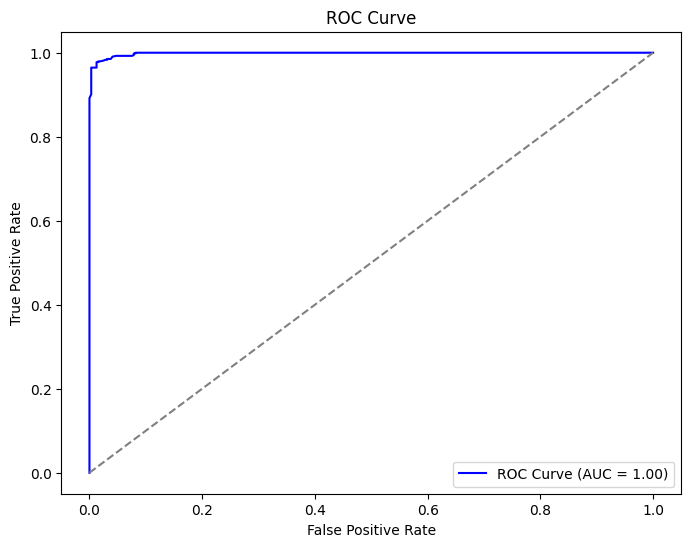

In [68]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()